# **What is Autism?**
Autism, or autism spectrum disorder (ASD), refers to a broad range of conditions characterized by challenges with social skills, repetitive behaviors, speech and nonverbal communication. According to the Centers for Disease Control, autism affects an estimated 1 in 36 children in the United States today.

There is not one autism but many subtypes, most influenced by a combination of genetic and environmental factors. Because autism is a spectrum disorder, each person with autism has a distinct set of strengths and challenges. The ways in which people with autism learn, think and problem-solve can range from highly skilled to severely challenged. Some people with ASD may require significant support in their daily lives, while others may need less support and, in some cases, live entirely independently.

But there is no ascertain way to tell whether a person has Autism or not because there are no such diagnostics methods available to diagnose this disorder. So we are trying to use Machine learning to predict whether a person suffers from autism or not based on the given data.

In [47]:
#importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [48]:
#loading the dataset
mydf = pd.read_csv("/content/autism_dataset.csv")
mydf.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [49]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [50]:
mydf.shape

(800, 22)

In [51]:
mydf.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [52]:
mydf.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [53]:
mydf.replace("?", np.nan, inplace=True)

In [54]:
mydf.isnull().sum()

ID                   0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          203
jaundice             0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation            40
Class/ASD            0
dtype: int64

In [55]:
mydf["ethnicity"].value_counts()

White-European     257
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64

In [56]:
mydf["relation"].value_counts()

Self                        709
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: relation, dtype: int64

In [57]:
mydf = mydf.replace({"others": "Others", "yes":1, "no":0})

# **Performing EDA**

In [58]:
class_asd = mydf['Class/ASD'].value_counts()

In [59]:
class_asd.values

array([639, 161])

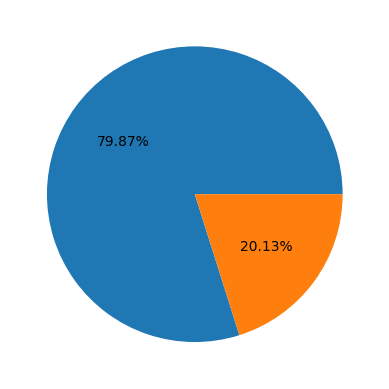

In [60]:
plt.pie(class_asd, autopct="%1.2f%%")
plt.show()

In [61]:
int_list = []
object_list = []
float_list = []

for col in mydf.columns:
  if mydf[col].dtype == int:
    int_list.append(col)
  elif mydf[col].dtype == object:
    object_list.append(col)
  else:
    float_list.append(col)

In [62]:
print(int_list)
print(object_list)
print(float_list)

['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'austim', 'used_app_before', 'Class/ASD']
['gender', 'ethnicity', 'contry_of_res', 'age_desc', 'relation']
['age', 'result']


In [63]:
#we want to take A1---A10 scores for analysis and plots, so removing the other int columns from list

int_list.remove("ID")
int_list.remove("Class/ASD")

In [64]:
a_score = int_list[:10]

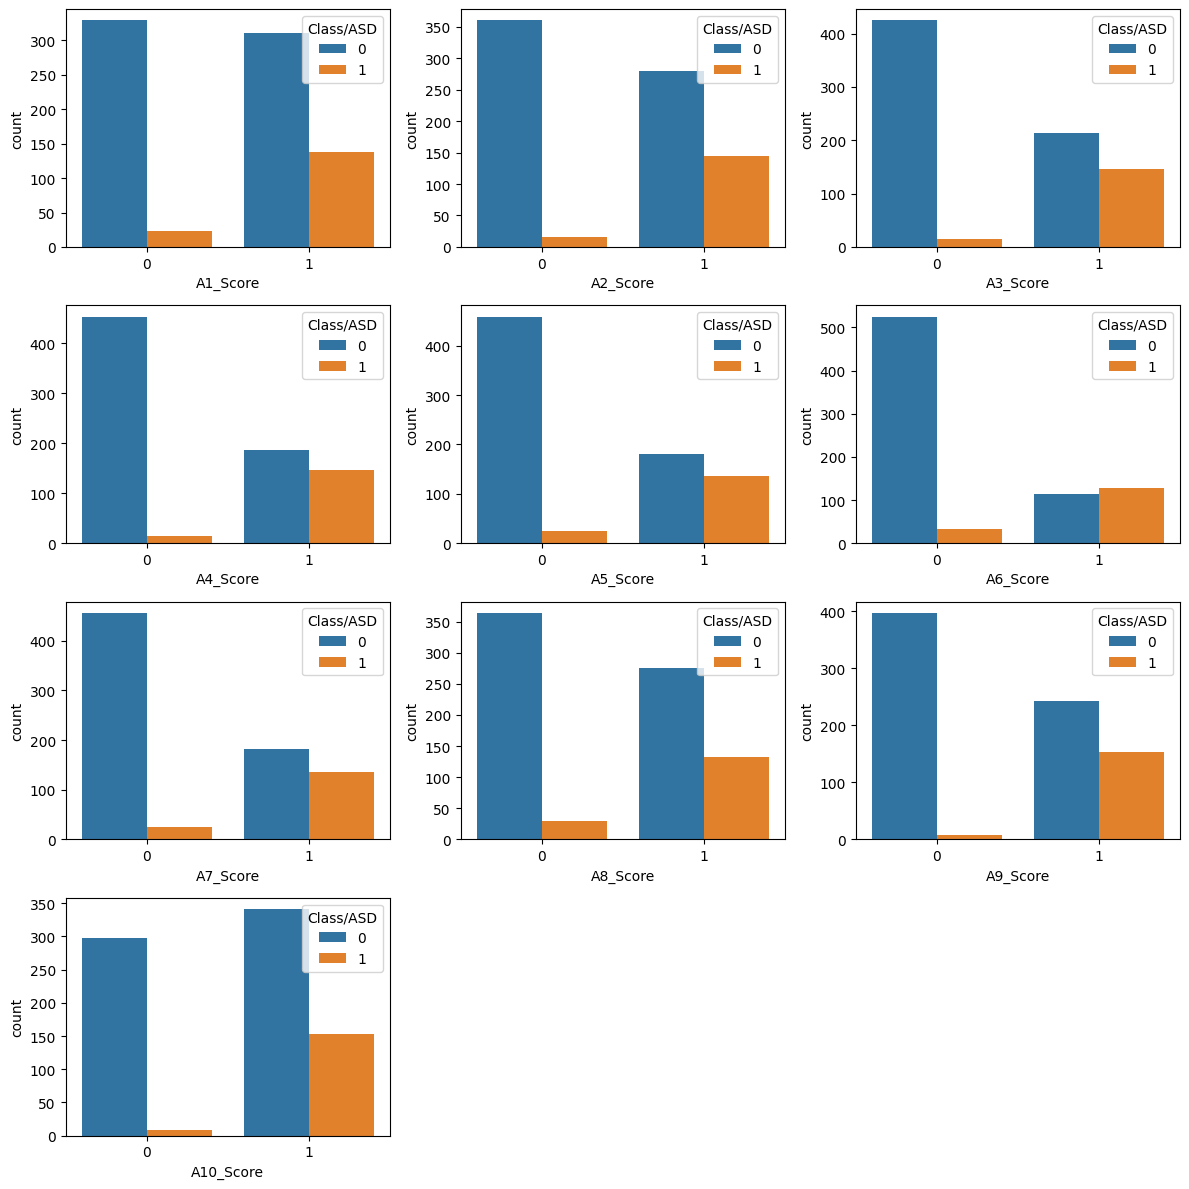

In [65]:
plt.subplots(figsize=(12,12))

for i, col in enumerate(a_score):
  plt.subplot(4,3,i+1)
  sns.countplot(x=mydf[col], hue=mydf["Class/ASD"])
plt.tight_layout()
plt.show()


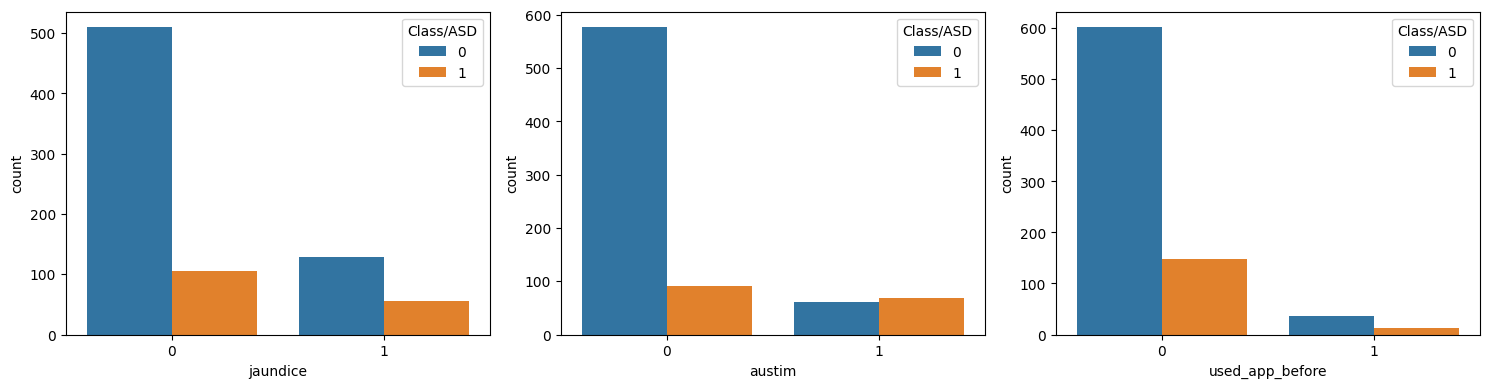

In [66]:
plt.subplots(figsize=(15,15))

for i, col in enumerate(int_list[10:]):
  plt.subplot(4,3,i+1)
  sns.countplot(x = mydf[col], hue=mydf['Class/ASD'])
plt.tight_layout()
plt.show()


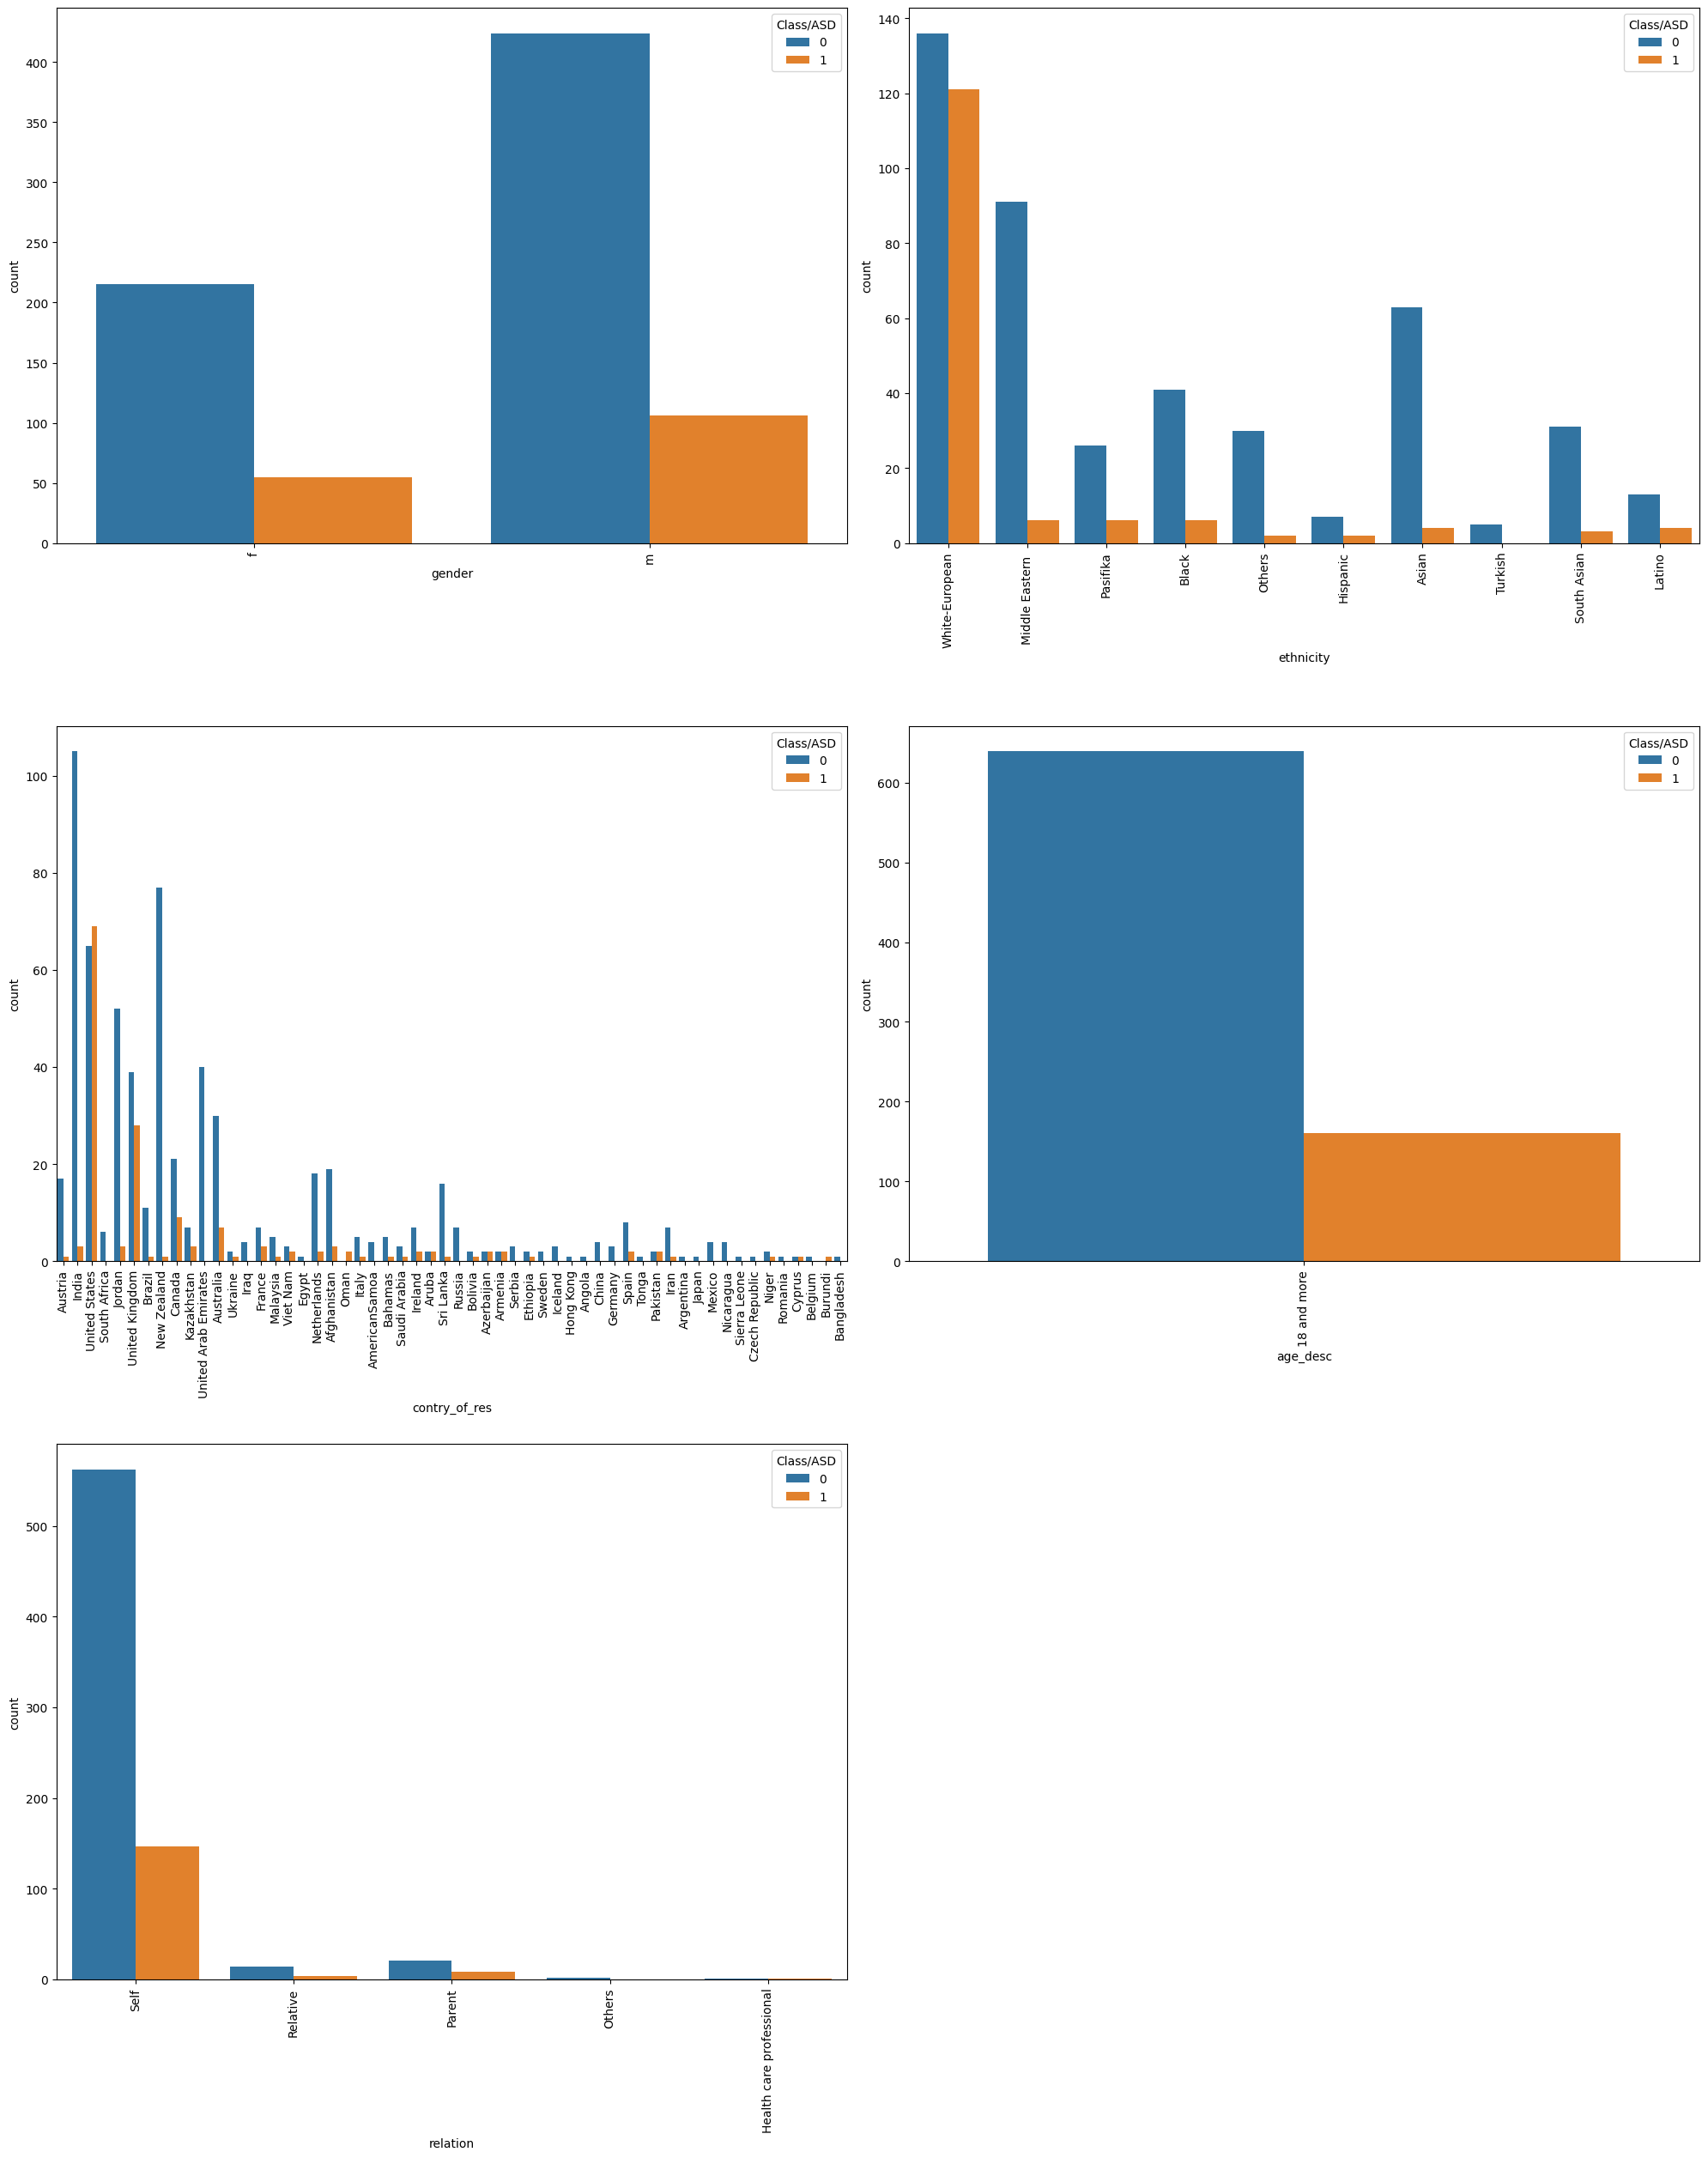

In [67]:
plt.subplots(figsize=(20, 40))

for i, col in enumerate(object_list):
	plt.subplot(5, 2, i+1)
	sns.countplot(x=mydf[col], hue=mydf['Class/ASD'])
	plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


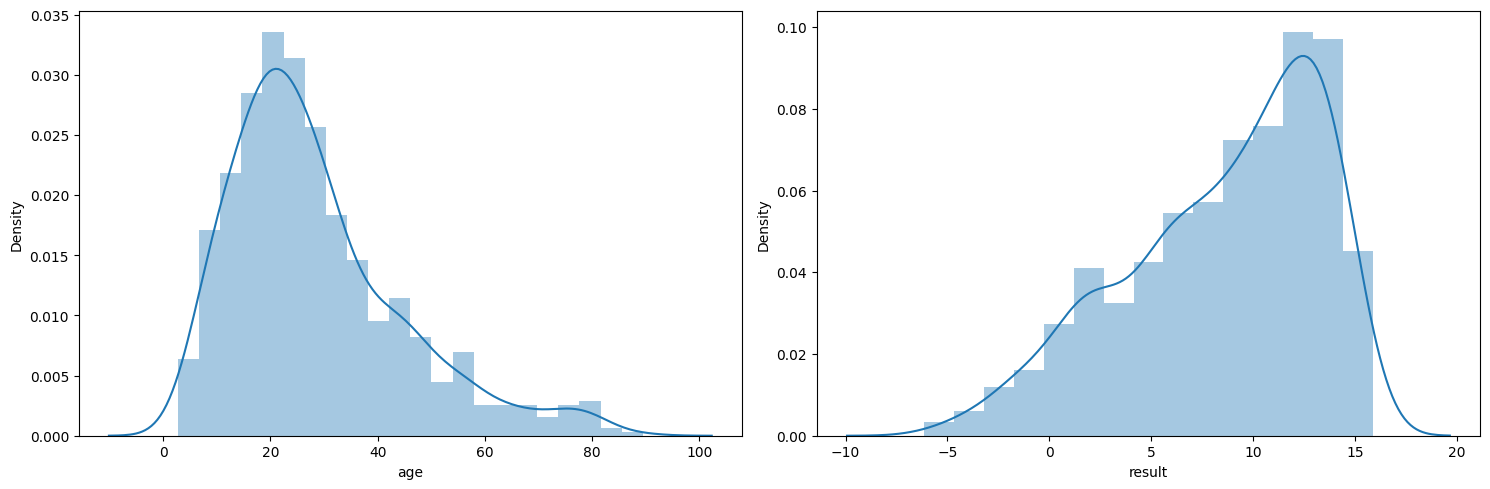

In [68]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(float_list):
  plt.subplot(1,2,i+1)
  sns.distplot(mydf[col])
plt.tight_layout()
plt.show()


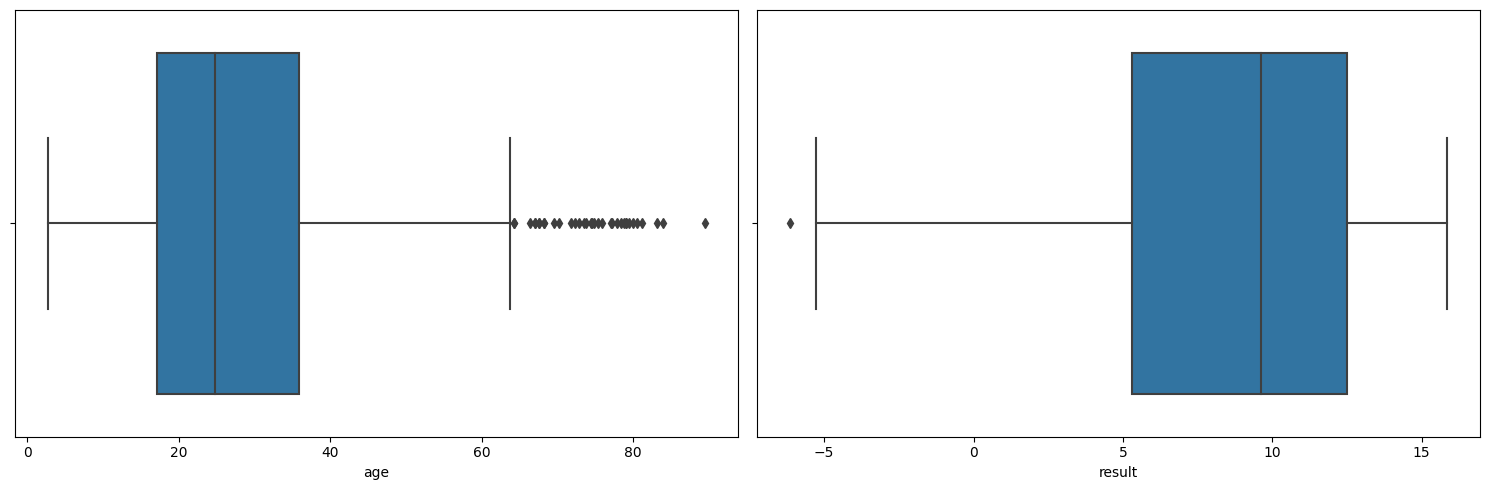

In [69]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(float_list):
  plt.subplot(1,2,i+1)
  sns.boxplot(x=mydf[col])
plt.tight_layout()
plt.show()


In [70]:
#removing the outliers
mydf = mydf[mydf["result"]>-5]
mydf.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,NaN,0,0,Austria,0,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,NaN,0,0,India,0,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,NaN,0,0,United States,0,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,NaN,0,0,South Africa,0,-4.777286,18 and more,Self,0


In [71]:
mydf.shape

(798, 22)

In [72]:
#imputing the missing values of Ethnicity andd Relation using most frequesnt values

simple_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

mydf["ethnicity"] = simple_imputer.fit_transform(mydf[["ethnicity"]]).reshape(-1)
mydf["relation"] = simple_imputer.fit_transform(mydf[["relation"]]).reshape(-1)

In [73]:
mydf.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

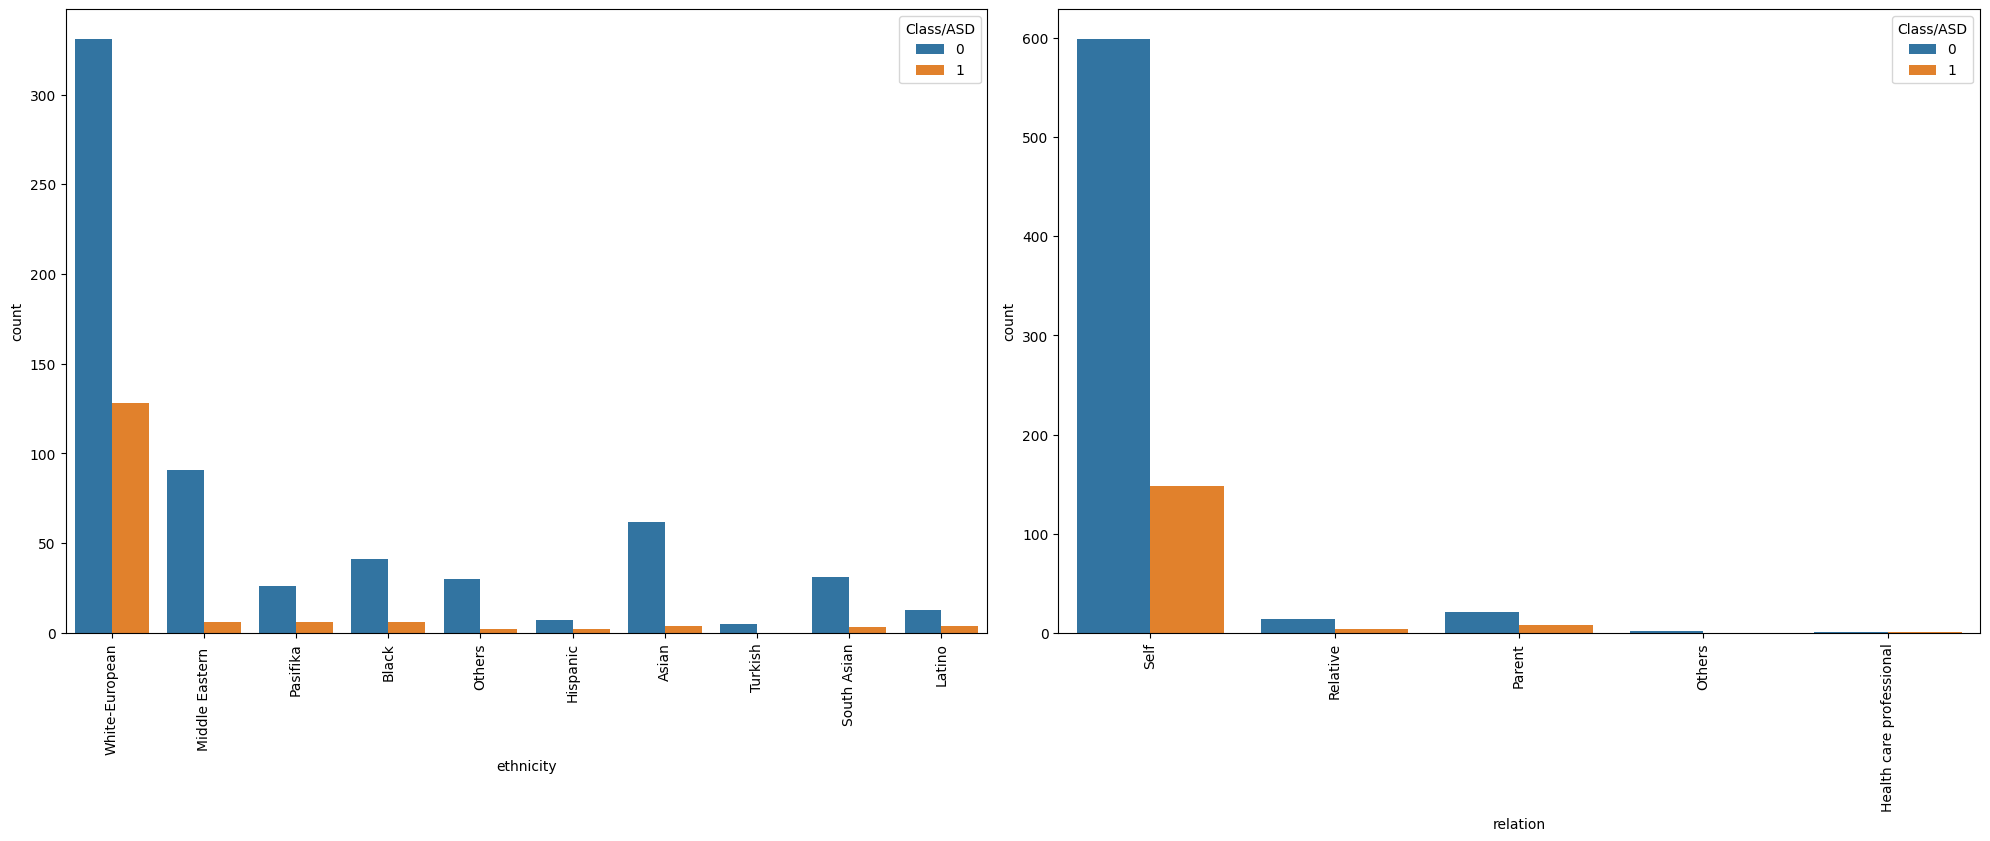

In [74]:
plt.subplots(figsize=(20, 40))

lis = ["ethnicity", "relation"]
for i, col in enumerate(lis):
	plt.subplot(5, 2, i+1)
	sns.countplot(x=mydf[col], hue=mydf['Class/ASD'])
	plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Feature engineering

In [75]:
def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

mydf['ageGroup'] = mydf['age'].apply(convertAge)


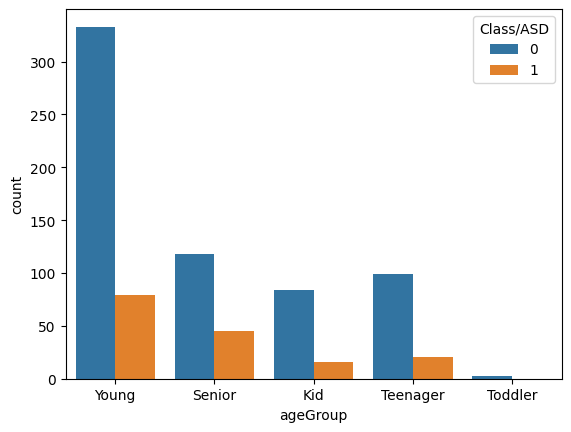

In [76]:
sns.countplot(x=mydf["ageGroup"], hue=mydf["Class/ASD"])
plt.show()

In [77]:
def add_feature(df):
  df['sum_score'] = 0
  for col in df.loc[:,'A1_Score':'A10_Score'].columns:
    df['sum_score'] += df[col]
  df['ind'] = df['austim'] + df['used_app_before'] + df['jaundice']
  return df

mydf = add_feature(mydf)


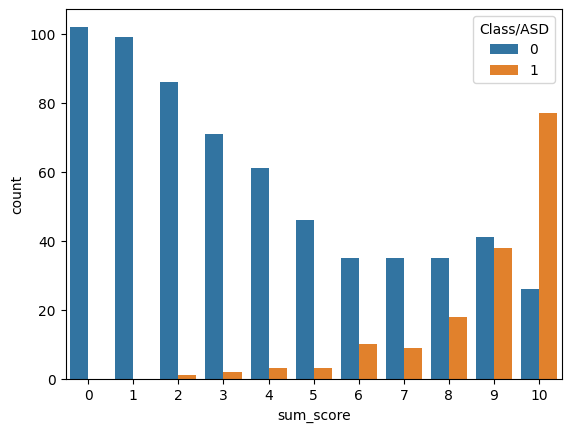

In [78]:
sns.countplot(x=mydf["sum_score"], hue=mydf["Class/ASD"])
plt.show()

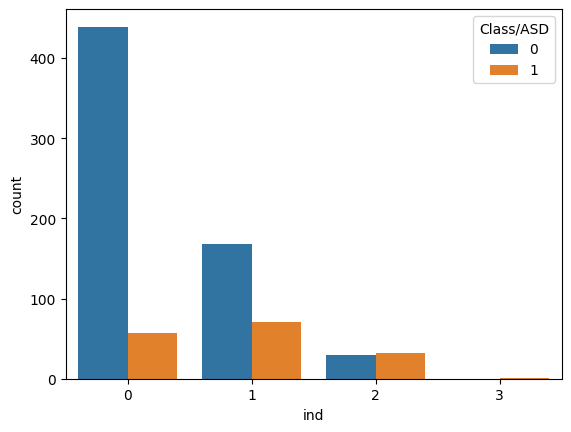

In [79]:
sns.countplot(x=mydf["ind"], hue=mydf["Class/ASD"])
plt.show()

In [80]:
# Applying log transformations to remove the skewness of the data.
mydf['age'] = mydf['age'].apply(lambda x: np.log(x))

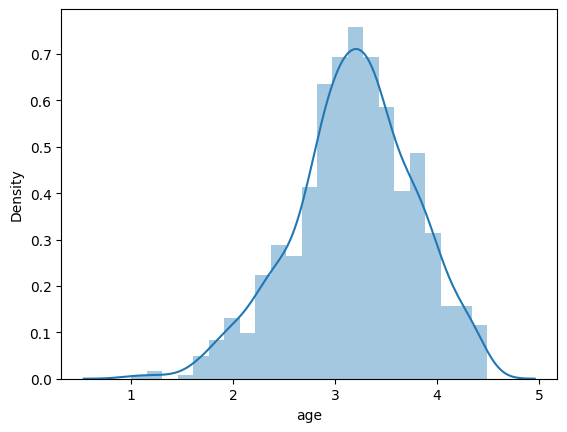

In [81]:
sns.distplot(mydf['age'])
plt.show()

In [82]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 799
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               798 non-null    int64  
 1   A1_Score         798 non-null    int64  
 2   A2_Score         798 non-null    int64  
 3   A3_Score         798 non-null    int64  
 4   A4_Score         798 non-null    int64  
 5   A5_Score         798 non-null    int64  
 6   A6_Score         798 non-null    int64  
 7   A7_Score         798 non-null    int64  
 8   A8_Score         798 non-null    int64  
 9   A9_Score         798 non-null    int64  
 10  A10_Score        798 non-null    int64  
 11  age              798 non-null    float64
 12  gender           798 non-null    object 
 13  ethnicity        798 non-null    object 
 14  jaundice         798 non-null    int64  
 15  austim           798 non-null    int64  
 16  contry_of_res    798 non-null    object 
 17  used_app_before 

In [83]:
print(mydf.head(5))

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  austim  contry_of_res used_app_before     result  \
0         0         1  ...       0        Austria               0   6.351166   
1         0         0  ...       0          India               0   2.255185   
2         1         1  ...       1  United States               0  14.851484   
3         0         0  ...       0  United States               0   2.276617   
4         0         0  ...       0   South Africa               0  -4.777286   

      age_desc  relation Class/ASD  ageGroup

In [84]:
def encode_labels(d):
  for col in d.columns:
    if d[col].dtype == 'object':
      le = LabelEncoder()
      d[col] = le.fit_transform(d[col])
  return d

mydf = encode_labels(mydf)

In [85]:
print(mydf.head(5))

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  austim  contry_of_res  used_app_before     result  \
0         0         1  ...       0              7                0   6.351166   
1         0         0  ...       0             25                0   2.255185   
2         1         1  ...       1             54                0  14.851484   
3         0         0  ...       0             54                0   2.276617   
4         0         0  ...       0             46                0  -4.777286   

   age_desc  relation  Class/ASD  ageG

In [86]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 799
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               798 non-null    int64  
 1   A1_Score         798 non-null    int64  
 2   A2_Score         798 non-null    int64  
 3   A3_Score         798 non-null    int64  
 4   A4_Score         798 non-null    int64  
 5   A5_Score         798 non-null    int64  
 6   A6_Score         798 non-null    int64  
 7   A7_Score         798 non-null    int64  
 8   A8_Score         798 non-null    int64  
 9   A9_Score         798 non-null    int64  
 10  A10_Score        798 non-null    int64  
 11  age              798 non-null    float64
 12  gender           798 non-null    int64  
 13  ethnicity        798 non-null    int64  
 14  jaundice         798 non-null    int64  
 15  austim           798 non-null    int64  
 16  contry_of_res    798 non-null    int64  
 17  used_app_before 

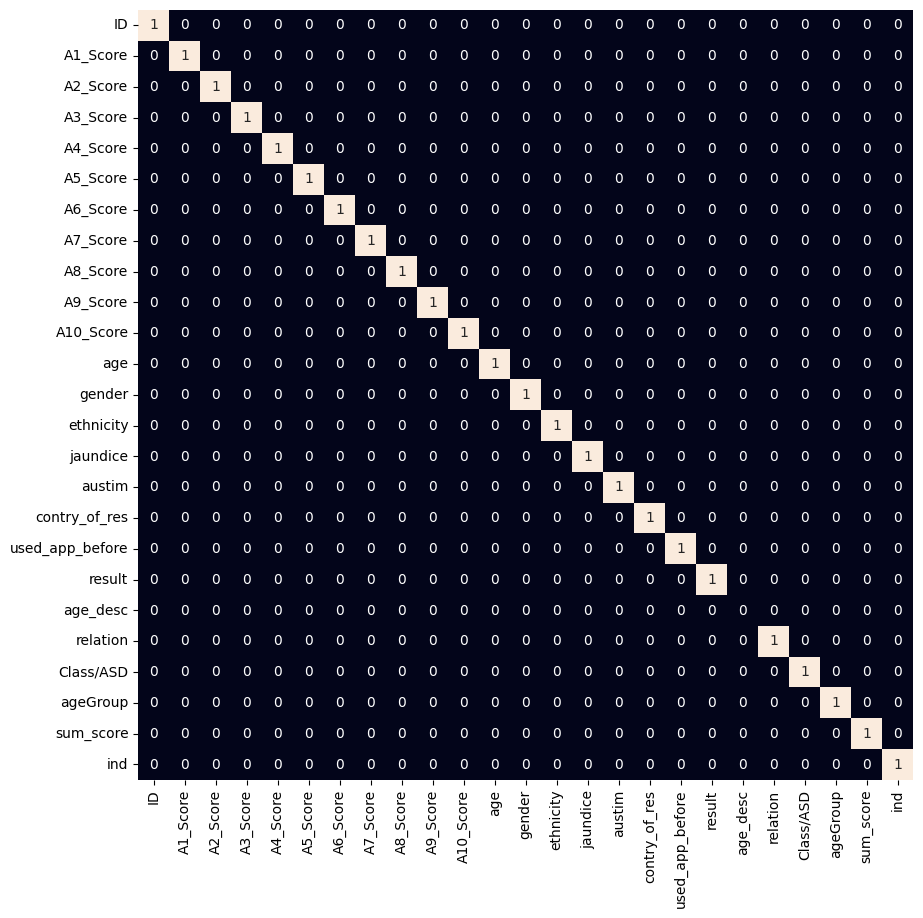

In [87]:
# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(mydf.corr() > 0.8, annot=True, cbar=False)
plt.show()

# **Splitting the dataset, applying the model**

In [88]:
#removing unncecessary columns
y = mydf["Class/ASD"]
X = mydf.drop(["age_desc", "ID", "used_app_before", "Class/ASD"], axis=1)
X,y

(     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
 0           1         0         1         0         1         0         1   
 1           0         0         0         0         0         0         0   
 2           1         1         1         1         1         1         1   
 3           0         0         0         0         0         0         0   
 4           0         0         0         0         0         0         0   
 ..        ...       ...       ...       ...       ...       ...       ...   
 795         0         1         0         0         0         0         0   
 796         0         1         1         0         0         1         0   
 797         0         0         0         0         0         0         0   
 798         0         0         0         0         0         0         0   
 799         0         1         0         0         0         0         0   
 
      A8_Score  A9_Score  A10_Score  ...  gender  ethnicity  j

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, y = ros.fit_resample(X_train,y_train)
X.shape, y.shape

((1028, 21), (1028,))

In [90]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)


In [91]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, y)

  print(f'{model} : ')
  print('Training set Accuracy : ', metrics.roc_auc_score(y, model.predict(X)))
  print('Testing set Accuracy : ', metrics.roc_auc_score(y_test, model.predict(X_test)))
  print()


LogisticRegression() : 
Training set Accuracy :  0.8472762645914397
Testing set Accuracy :  0.8010327400571302

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training set Accuracy :  1.0
Testing set Accuracy :  0.7822456602944408

SVC() : 
Training set Accuracy :  0.9377431906614786
Testing